In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "..input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass
print('completed')

completed


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Directory paths
train_dir = 'input/dataset_blood_group'

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of the data for validation
)

# Train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Low accuracy model with Input layer
def create_low_accuracy_model():
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the low accuracy model
low_acc_model = create_low_accuracy_model()

# Train the low accuracy model
history_low_acc = low_acc_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the low accuracy model
low_acc_eval = low_acc_model.evaluate(validation_generator)
print(f"Low Accuracy Model - Loss: {low_acc_eval[0]}, Accuracy: {low_acc_eval[1]}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32

# Directory paths (adjust as needed)
train_dir = 'input/dataset_blood_group'

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    validation_split=0.2  # Use 20% of the data for validation
)

# Train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Training data subset
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Validation data subset
)

# High accuracy model: Deep CNN
def create_high_accuracy_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Regularization to prevent overfitting
        tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
high_acc_model = create_high_accuracy_model()

# Train the model
history_high_acc = high_acc_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,  # Adjust the number of epochs based on your preference
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model on validation data
high_acc_eval = high_acc_model.evaluate(validation_generator)
print(f"High Accuracy Model - Loss: {high_acc_eval[0]}, Accuracy: {high_acc_eval[1]}")


Found 4803 images belonging to 8 classes.
Found 1197 images belonging to 8 classes.
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.2643 - loss: 1.8514 - val_accuracy: 0.7829 - val_loss: 0.5615
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.9375 - loss: 0.3242 - val_accuracy: 1.0000 - val_loss: 0.1454
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.7749 - loss: 0.5880 - val_accuracy: 0.7652 - val_loss: 0.6510
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - accuracy: 0.8125 - loss: 0.3862 - val_accuracy: 0.6923 - val_loss: 0.6314
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.8058 - loss: 0.5114 - val_accuracy: 0.8463 - val_loss: 0.4072
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - accuracy: 0.9062 - loss: 0.2799 - val_accuracy: 0.7692 - val_loss: 0.4078
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.8299 - loss: 0.4565 - val_accuracy: 0.8649 - val_loss: 0.3442
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9375 - loss: 0.2960 - va

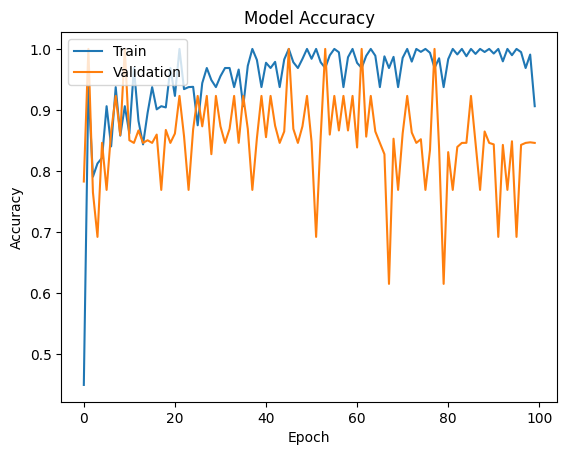

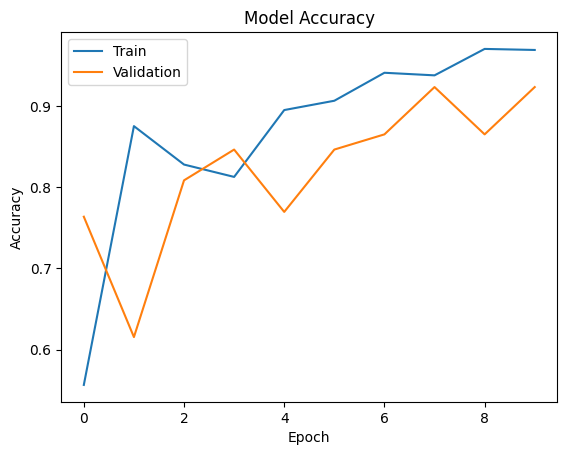

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Call the function to display the accuracy graph
plot_accuracy(history_high_acc)
plot_accuracy(history_low_acc)

In [ ]:
import pickle
with open('low_acc_model.pkl','wb') as f:
    pickle.dump(low_acc_model,f)
with open('high_acc_model.pkl','wb') as f:
    pickle.dump(high_acc_model,f)

In [ ]:
high_acc_model.save("high_acc_model.h5")
low_acc_model.save("low_acc_model.h5")

In [ ]:
import os
import random
import shutil

# Dataset directory
dataset_dir = 'input/dataset_blood_group'

# Output directory for saving the random file
output_dir = '/working/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List all blood group types (subdirectories)
blood_groups = [bg for bg in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, bg))]

# Choose a random blood group
selected_group = random.choice(blood_groups)

# List all files in the selected blood group directory
group_files = os.listdir(os.path.join(dataset_dir, selected_group))

# Choose a random file
selected_file = random.choice(group_files)

# Create a new random number for the filename
random_number = random.randint(1000, 9999)
new_file_name = f"{selected_group}_{random_number}.bmp"

# Source and destination paths
source_path = os.path.join(dataset_dir, selected_group, selected_file)
destination_path = os.path.join(output_dir, new_file_name)

# Copy the file with the new name
shutil.copy(source_path, destination_path)

print(f"Random file copied: {selected_file}")
print(f"New file saved as: {new_file_name} in {output_dir}")


Random file copied: cluster_6_2986.BMP
New file saved as: O+_2970.bmp in /working/
